In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import datasets

In [2]:
newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

## vectorize text data

In [3]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

## Grid search 
(best C parameter)

In [4]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}

cv = KFold(n_splits=5, shuffle=True, random_state=241)
model = SVC(kernel="linear", random_state=241)

gs = GridSearchCV(model, grid, scoring='precision', cv=cv)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=241,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

## GridSearchCV scoring 
'precision' provides the best C=10 instead of C=1 if 'accuracy' is used


In [8]:
d = gs.cv_results_

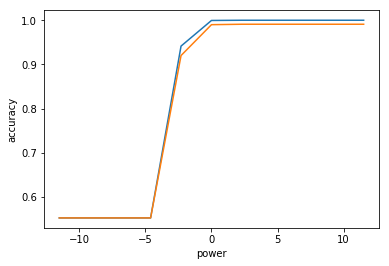

In [10]:
plt.plot([np.log(x) for x in d["param_C"].data], d["mean_train_score"])
plt.plot([np.log(x) for x in d["param_C"].data], d["mean_test_score"])

plt.xlabel("power")
plt.ylabel("accuracy");

## now fit the data with the best parameters from the grid search

In [11]:
C = gs.best_params_["C"]
model = SVC(kernel="linear", random_state=241, C=C)
model.fit(X,y)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=241,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
arr = np.abs(model.coef_.toarray()[0])
idx = np.argsort(arr)[-10:]
idx

array([18430, 15606,  5776, 21850, 23673, 17802,  5093,  5088, 12871,
       24019])

In [31]:
words = np.asarray(vectorizer.get_feature_names())[idx]

array(['nick', 'keith', 'bible', 'religion', 'sky', 'moon', 'atheists',
       'atheism', 'god', 'space'], dtype='<U80')

In [32]:
words = [feature_mapping[i].lower() for i in idx]
print(sorted(words))

['atheism', 'atheists', 'bible', 'god', 'keith', 'moon', 'nick', 'religion', 'sky', 'space']


## sorted provides a lixicographical order

In [33]:
w = open("./week3/answer_text_svm.txt", "w")
w.write(",".join(sorted(words)))
w.close()